# K-Means Clustering with scikit-learn
Clustering is the task of grouping similar objects together. What we know about each cluster is that each one contains similar intances, but we do not know the name or the label of the clusters. Because the lable is unknown, clustering is an unsupervised learning task. One of the most popular algorithms of clustering is the K-Means algorithm. 

The K-Means algorithm is based on picking $k$ number of random data points and assigns them as the initial centriods ($\mu_1, \mu_2, ... , \mu_k$) of the $k$ clusters. Then the algorithm takes the other data points and it calculates their distances to each of the centriods $\mu_i$. A data point with the smallest distance from a centriod $\mu_i$ gets assigned to cluster $k=i$. In the second iteration, the algorithm updates the centriods and re-assigns the other data points to clusters based on their distance to the updated centriods, and so on. 


## algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,  silhouette_samples
import numpy as np

In [2]:
def heatmap(dis , df):
   
    df_dis = pd.DataFrame(dis)
    df_dis.columns = df.index
    df_dis.index = df.index
    
    print(df_dis)
 
    g = sns.heatmap(df_dis)

In [3]:
def transformation (df):
    # 2. initialize the transformer (optionally, set parameters)
    my_min_max = MinMaxScaler(feature_range=(0,1))


    # 3. fit the transformer to the data
    my_min_max.fit(df)

    # 4. use the transformer to transform the data
    scaled_audio_features = my_min_max.transform(df)

    # 5. reconvert the transformed data back to a DataFrame
    transformed_df = pd.DataFrame(scaled_audio_features,
                 index=df.index,
                 columns=df.columns)
    return transformed_df

In [4]:
def KMeans_cluster(data, k):
    # 2. initialize the model
    my_kmeans = KMeans(n_clusters= k)

    # 3. fit the model to the data
    my_kmeans.fit(data) # pass your scaled data here
 
    # 4. obtain the cluster output
    clusters = my_kmeans.predict(data) # pass your scaled data here
    centroids = my_kmeans.cluster_centers_
    
    return clusters,  pd.DataFrame(centroids)
    # 5. attach the cluster output to our original DataFrame
#your_original_dataframe["cluster"] = clusters 

In [5]:
def clusters_num(data):
    inertia_list = []
    k = []
    sil_score = []
    for i in range(2,30):
        k.append(i)
        myKMeans = KMeans(n_clusters=i)
        myKMeans.fit(data)
        inertia_list.append(round(myKMeans.inertia_, 2))
        sil_score.append( round( silhouette_score(data, myKMeans.labels_), 2) ) 
    return inertia_list ,  sil_score, k

# 1- Load the data


In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [8]:

songs = pd.read_csv('/content/drive/MyDrive/data/df_audio_features_5000.csv')

In [ ]:
songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
1,Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
2,"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4
3,Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4
4,Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4


# 2- Pre-process the data

In [9]:
songs.set_index( ['name', 'artist'], inplace = True)


songs.drop(['key','mode', 'duration_ms' , 'time_signature'],  axis=1, inplace = True)

(len(songs.columns))

9

In [10]:
songs.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [11]:
# transform the data
transformed_data = transformation (songs)

# 3- Choose the right number of clusters
## 3.1 Inertia and the Elbow Method:
    The inertia is the mean squared distance between each instance and its closest centroid. 
    Inertia is not a good method to choose the right number of k because it keeps getting lower as we  increase the number of k. 

In [ ]:
inertia_list, sil_score ,k= clusters_num(transformed_data)


## 3.2 The silhouette coefficient
    It is a more precise approach to choose the right number of clusters. 

In [ ]:
inertia_list = []
sil_score = []

for i in range(10):
    a, b , k = clusters_num(transformed_data)
    inertia_list.append(a)
    sil_score.append(b)
    

In [46]:
inertia_list_mean = np.mean(inertia_list,0)
sil_score_mean = np.mean(sil_score,0)

NameError: ignored

Text(0.5, 0, 'k')

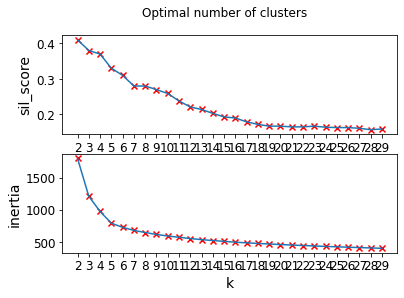

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Optimal number of clusters')
axs[0].plot(k , sil_score_mean)
axs[0].scatter(k , sil_score_mean, marker='x', color = 'red')
axs[0].set_ylabel('sil_score')

axs[0].set_xticks(k)
axs[1].plot(k , inertia_list_mean)
axs[1].scatter(k , inertia_list_mean, marker='x', color = 'red')
axs[1].set_ylabel('inertia')
axs[1].set_xticks(k)
axs[1].set_xlabel('k')
#fig.savefig('Optimal number of clusters')

# 3.3 The Silhouette Diagram

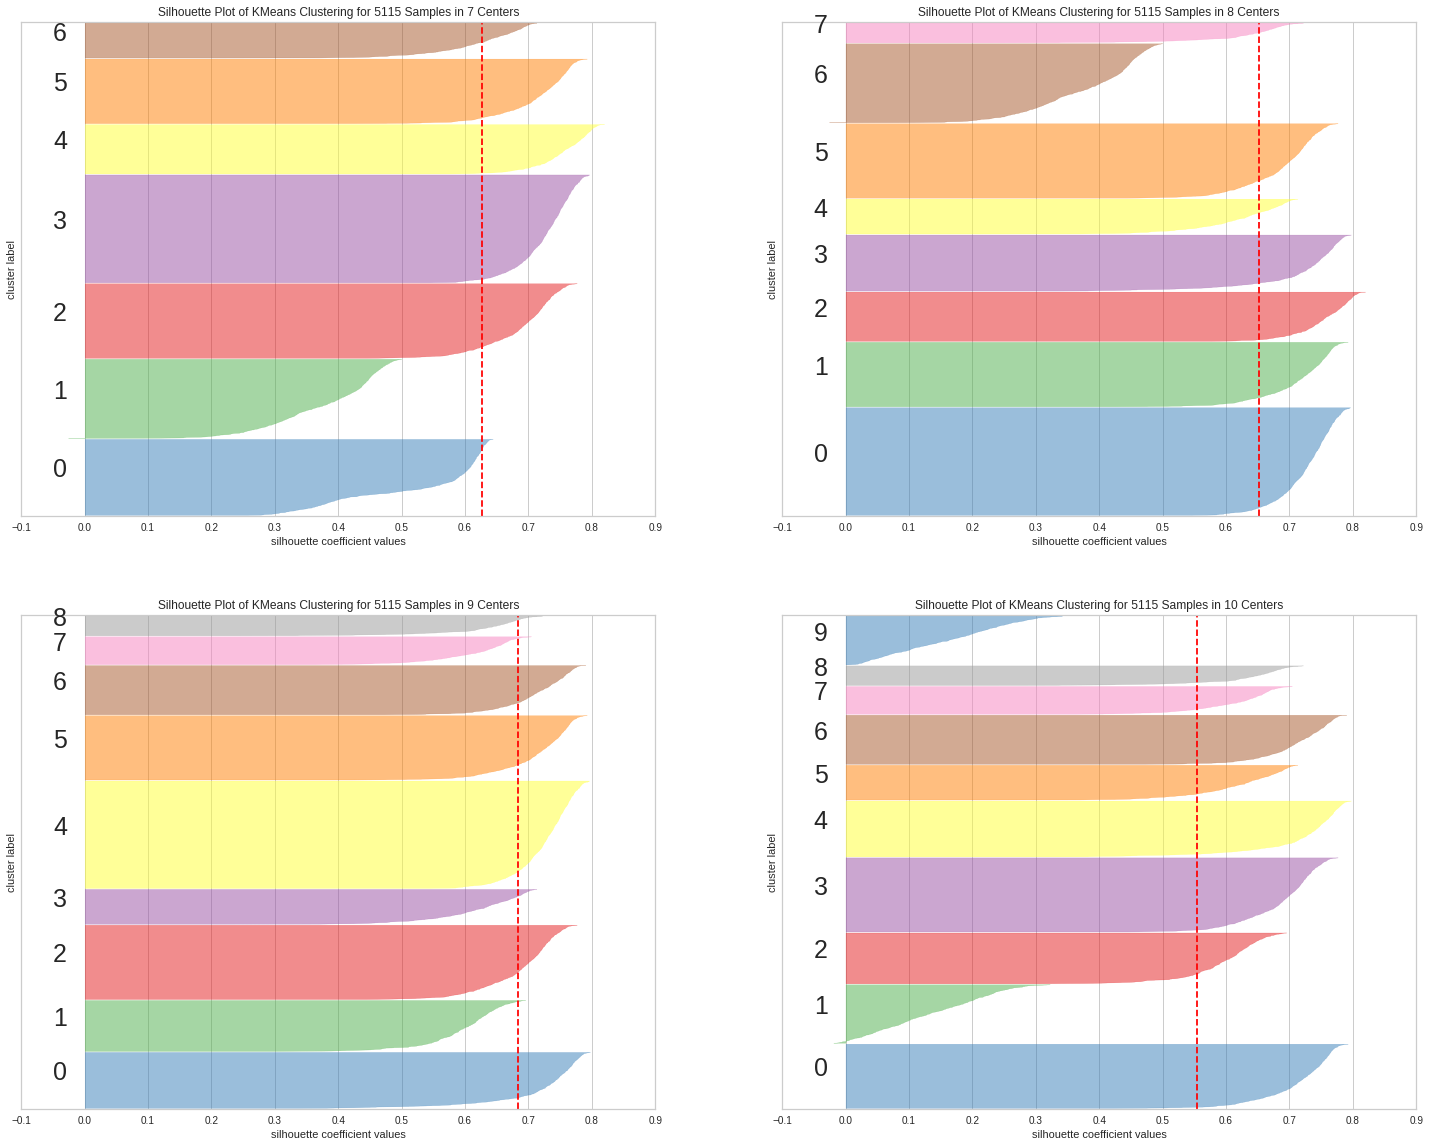

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(25,20))

axli = ax.flatten()

j = 0
 
for i in [ 7, 8, 9, 10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
   
    #print(ax[q-1][mod])
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax= axli[j] )

    visualizer.fit(transformed_data)
    visualizer.finalize()

    j+=1

# 4- cluster the data using the kmeans clustering method

By looking at the inertia and the silhouette coefficient plot, it does not seem trivial to choose the best number of clusters. While number 5 seems at the elbow, 6-10 are not too bad. 

I chose to use 9 clusters because the songs are 5000 and it makes sense that they include many genres. Furthermore, the silhouette diagram provides nice results for using 9 clusters.

In [ ]:
clusters, centroids = KMeans_cluster(transformed_data, 9)

In [ ]:
transformed_data["cluster"] = clusters

In [ ]:
cluster_1 = transformed_data.query( 'cluster == 1')

In [ ]:
len(cluster_1)

591

In [ ]:
cluster_2 = transformed_data.query( 'cluster == 2')
len(cluster_2)
        

1134